# EDA Dataset 4

## Importing Dataset 4

In [1]:
import sys
from pathlib import Path
import os

root = Path.cwd()
while root != root.parent and not (root / "pyproject.toml").exists():
    root = root.parent

sys.path.insert(0, str(root))
sys.path.insert(0, str(root / "src"))

os.chdir(root)

In [2]:
from __future__ import annotations
import numpy as np
import pandas as pd

# reusing the loader to access the data
from data_loader import load_dataset

# paths to dataset 4
TRAIN_X = "data/TrainData4.txt"
TRAIN_Y = "data/TrainLabel4.txt"
TEST_X = "data/TestData4.txt"

# the missing value given in the assignment
MISSING_VALUE = 1.0e99

### Loading data

In [3]:
x_train, y_train, x_test = load_dataset(TRAIN_X, TRAIN_Y, TEST_X)
x_train.shape, y_train.shape, x_test.shape

((1119, 11), (1119,), (480, 11))

### Label Distribution

Label distribution:
 label
3      7
4     39
5    471
6    447
7    141
8     14
Name: count, dtype: int64


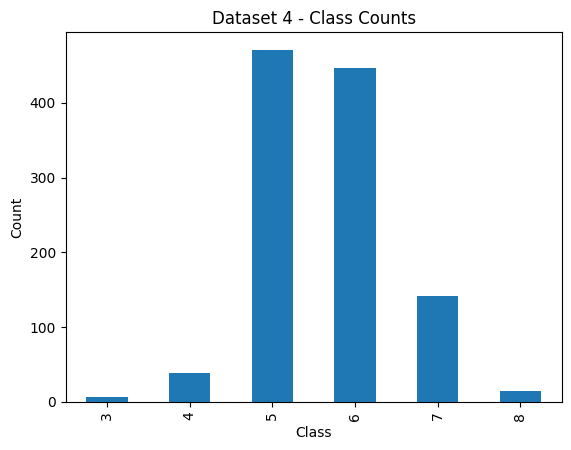

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dfy4 = pd.Series(y_train, name="label")
print("Label distribution:\n", dfy4.value_counts().sort_index())

dfy4.value_counts().sort_index().plot(kind="bar")
plt.title("Dataset 4 - Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Checking the Variance

In [5]:
dfx4 = pd.DataFrame(x_train, columns=[f"f{i+1}" for i in range(x_train.shape[1])])

variances4 = dfx4.var()
zero_var_4 = (variances4 == 0).sum()

print("Zero-variance features:", zero_var_4)
print("Lowest 10 variances:\n", variances4.sort_values().head(10))

Zero-variance features: 0
Lowest 10 variances:
 f8       0.000004
f5       0.002013
f9       0.023435
f10      0.026892
f2       0.032152
f3       0.036916
f11      1.118562
f4       2.152583
f1       2.974517
f6     109.887473
dtype: float64


## PCA Explained Variance (first 10 features)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler4 = StandardScaler()
x4_scaled = scaler4.fit_transform(dfx4.fillna(dfx4.mean()))

pca4 = PCA(n_components=10)  # enough to preview structure for 11 features
pca4.fit(x4_scaled)

expl_4 = pca4.explained_variance_ratio_
print("Explained variance (first 10 PCs):", np.round(expl_4[:10], 4))
print("Cumulative (10 PCs):", np.round(expl_4.sum(), 4))

Explained variance (first 10 PCs): [0.2782 0.1772 0.1391 0.1082 0.0871 0.0615 0.0554 0.0403 0.0314 0.0164]
Cumulative (10 PCs): 0.9947


## PCA Visualization

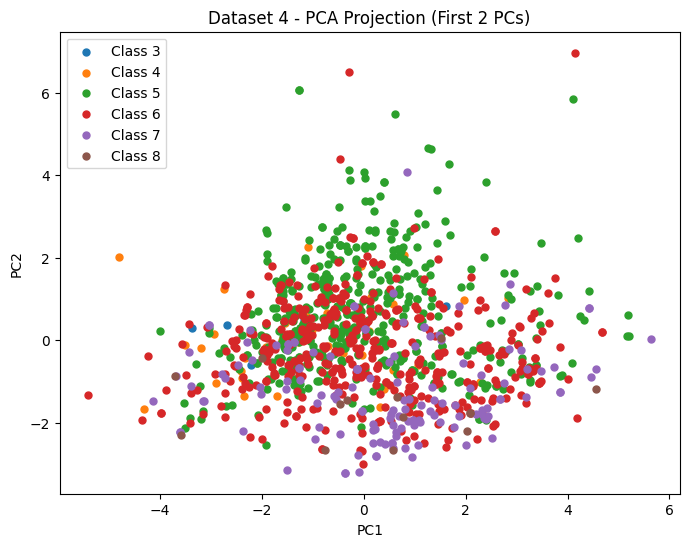

In [7]:
X4_pca2 = pca4.transform(x4_scaled)[:, :2]

plt.figure(figsize=(8,6))
for c in np.unique(y_train):
    mask = (y_train == c)
    plt.scatter(X4_pca2[mask, 0], X4_pca2[mask, 1], label=f"Class {c}", s=25)

plt.legend()
plt.title("Dataset 4 - PCA Projection (First 2 PCs)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
